# SHAP values for the sub_model

Warning: This notebook is very computationally intensive

Sources:  
https://shap.readthedocs.io/en/latest/generated/shap.KernelExplainer.html  
https://github.com/shap/shap/blob/master/notebooks/tabular_examples/neural_networks/Census%20income%20classification%20with%20Keras.ipynb

Shap version: shap-0.45.0


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score

import keras

import tensorflow as tf


In [46]:
def set_reproducible():
    np.random.seed(12345)
    random.seed(12345)
    tf.random.set_seed(12345)
    
set_reproducible()

In [47]:
dps1200 = pd.read_csv("/home/mel/Masterthesis/Masterthesis_code/raw_data/csv/dps1200.csv")

In [48]:
dps1200.rename(columns=lambda x: x.replace('X', ''), inplace=True)
y = dps1200.iloc[:,4:]
feature_labels = y.columns.values
feature_wavelengths = feature_labels.astype(int)

In [49]:
y = dps1200.iloc[:,4:]
xp = y.columns.values
xp = xp.astype(int)

In [50]:
features = dps1200.iloc[:, 4:].values
labels = dps1200.iloc[:, 0].values

In [51]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [52]:
print(test_data.shape)

(258, 410)


In [53]:
model_path = "/home/mel/Masterthesis/Masterthesis_code/code/sub_data/dps1200sub_model.keras"

In [54]:
dps1200sub_model = tf.keras.models.load_model(model_path)

# Show the model architecture
dps1200sub_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 410, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 366, 55)        │         2,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 331, 43)        │        85,183 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 331, 63)        │         2,772 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 165, 63)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10395)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10395)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 351)            │     3,648,996 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 351)            │       123,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 351)            │       123,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           352 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,960,813 (45.63 MB)

 Trainable params: 3,986,937 (15.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,973,876 (30.42 MB)

In [55]:
print(type(dps1200sub_model))

<class 'keras.src.models.sequential.Sequential'>


# SHAP

In [56]:
import shap

In [57]:
def f(X):
    return dps1200sub_model.predict(X, verbose=0).flatten()

In [58]:
# Use the 10-means for representing the dataset
mean_features = shap.kmeans(features, 10)

# Use the kernel exlainer as it's able to exlain an arbitrary function
explainer = shap.KernelExplainer(f, mean_features)

# We need to take more samples than we have features, otherwise we'll get an error
shap_values = explainer.shap_values(features, nsamples=2000)

100%|██████████| 1290/1290 [3:19:05<00:00,  9.26s/it] 


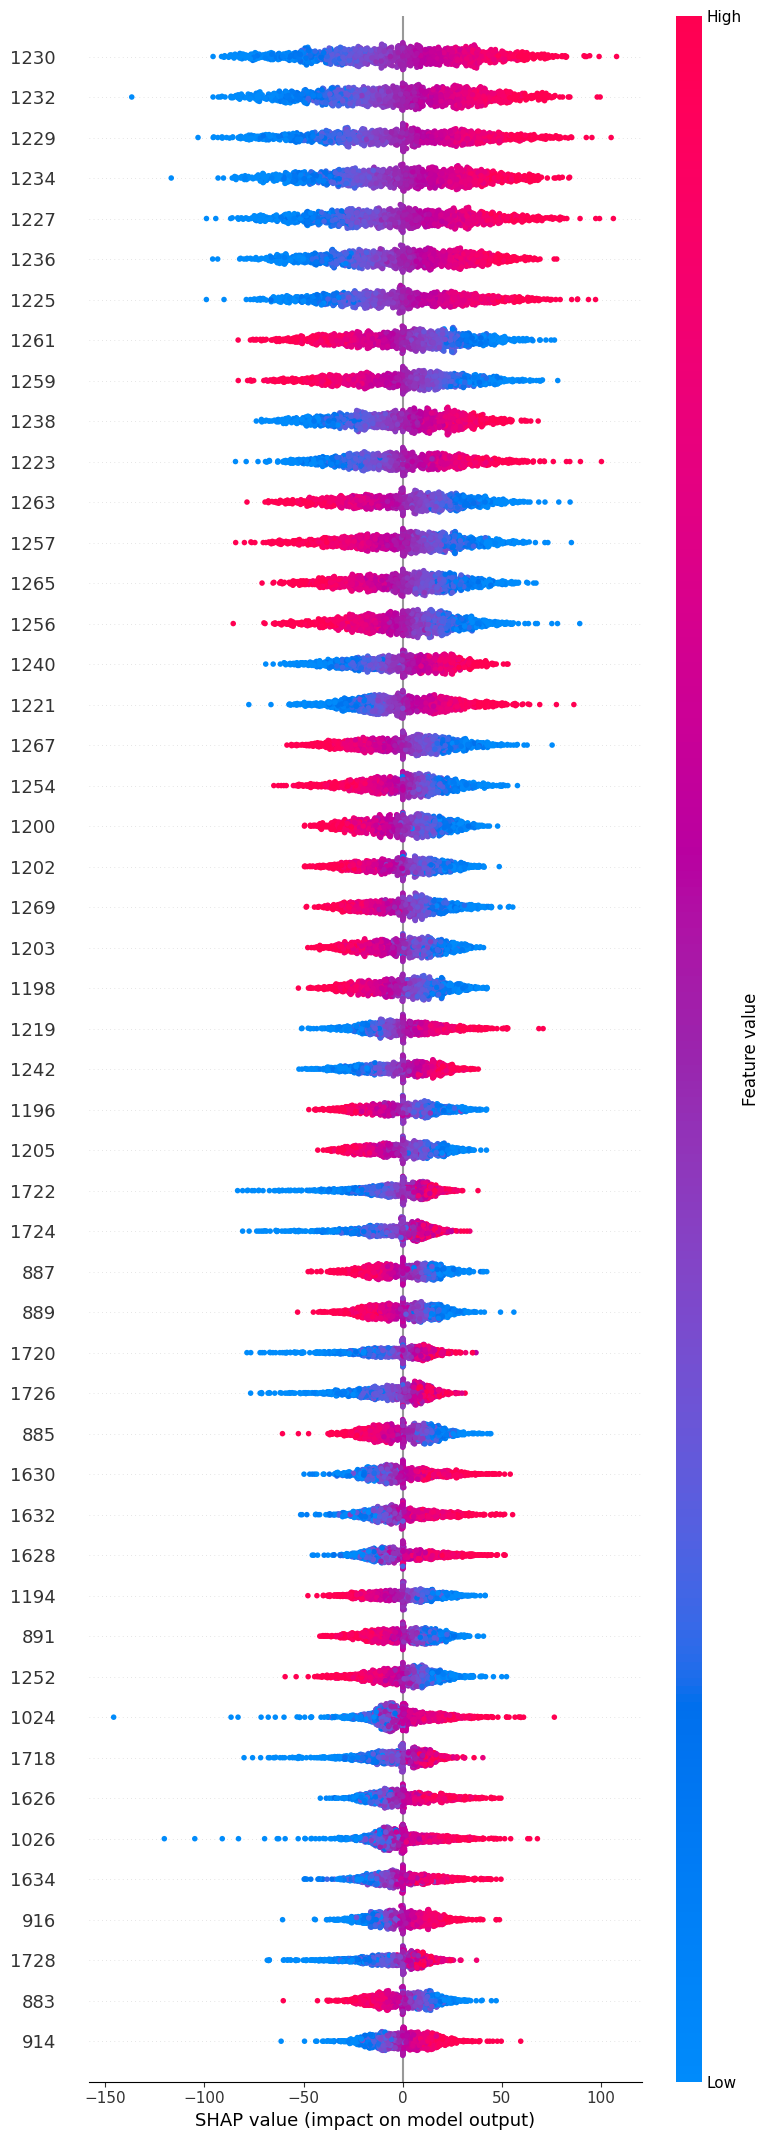

In [59]:
shap.summary_plot(shap_values, features=features, feature_names=feature_labels, max_display=50)

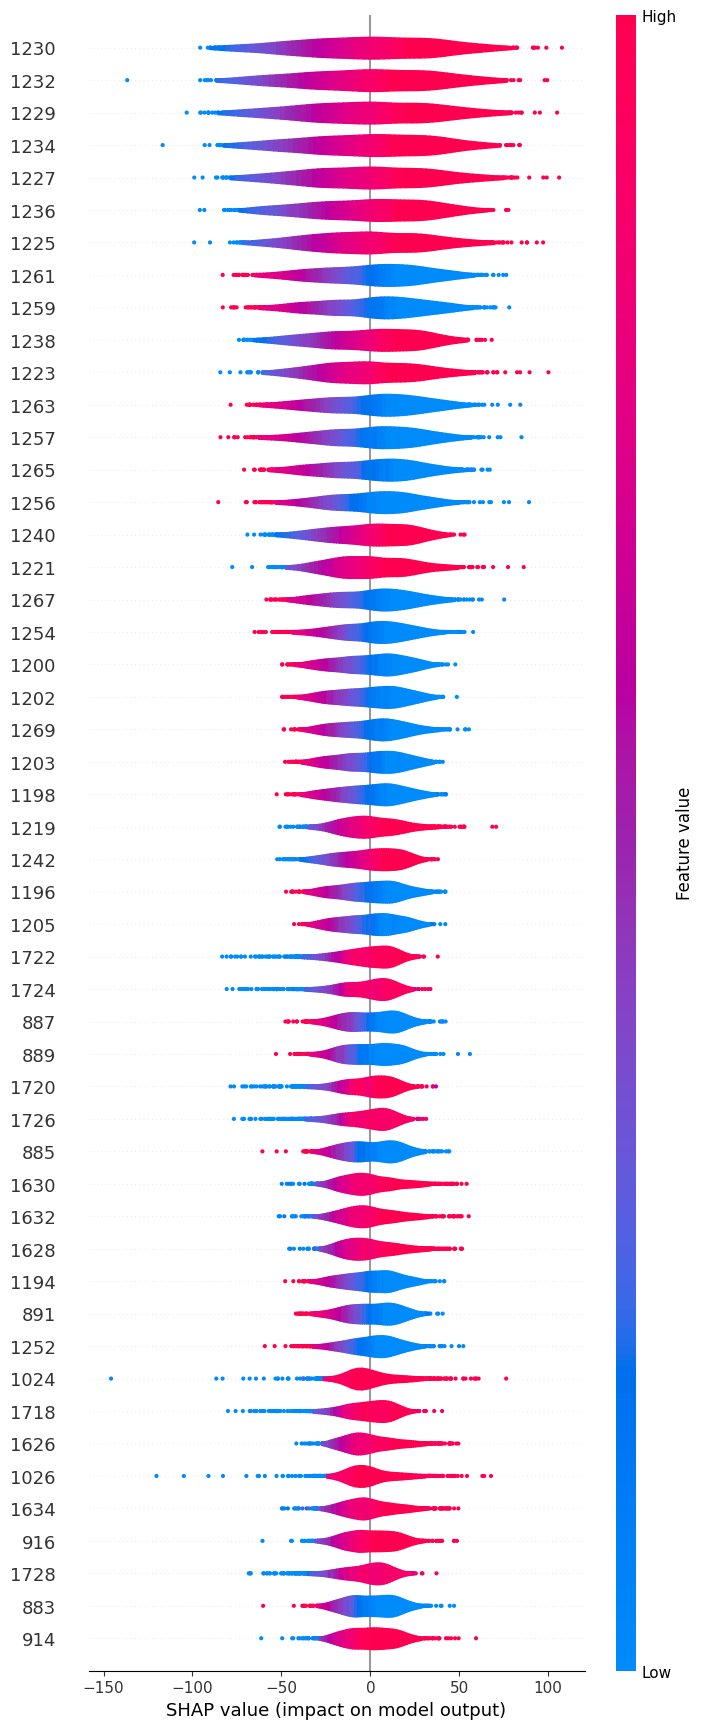

In [60]:
shap.plots.violin(shap_values, features=features, feature_names=feature_labels, max_display=50, plot_type="violin")